# TP 2 | Algorithmique & Python

## TIDE 2023/2024

BENSEFIA Walid

HAFDI Ramy

# Algo 1 : Tri bulle

In [1]:
def tri_a_bulles(T):
    n = len(T)
    for i in range(n - 1, 0, -1):
        for j in range(i):
            if T[j + 1] < T[j]:
                T[j], T[j + 1] = T[j + 1], T[j]

In [2]:
test= (
[1,2,3],
[3,2,1],
[3,1,2],
[1,3,2,4,5],
[5,4,3,2,1],
[1,3,4,2,5],
[0,0,1,0,0]
)

resultats = []

for t in test :
  tri_a_bulles(t)
  resultats.append(t)

print(resultats)

[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [0, 0, 0, 0, 1]]


# Experementation 1

1. La fonction rand

In [10]:
from IPython.utils.path import random

def rand(n):
    if n <= 0:
        return []  # Retourne une liste vide si n est inférieur ou égal à zéro
    else:
        return [random.randint(0, 10 * n) for _ in range(n)]



2. Test

In [8]:
test2 = [2,5,12,7,15,9]

resultats2 = []

for t in test2 :
  t2 = rand(t)
  print(t2)

[13, 6]
[43, 33, 17, 1, 15]
[104, 47, 120, 96, 46, 114, 85, 50, 69, 59, 103, 48]
[22, 35, 65, 3, 31, 22, 1]
[97, 97, 89, 44, 50, 15, 80, 113, 58, 63, 22, 45, 138, 61, 117]
[30, 0, 13, 64, 70, 14, 41, 22, 55]


3. Temps d'execution de la fonction Tri

In [16]:
import timeit

# Générer une liste aleatoire à trier
n=23 #taille de la liste
liste_a_trier = rand(n)

# Mesurez le temps d'exécution du tri à bulles
temps_execution = timeit.timeit(lambda: tri_a_bulles(liste_a_trier.copy()), number=1)

print(f"Temps d'exécution du tri à bulles pour n = {n} : {temps_execution:.6f} secondes")


Temps d'exécution du tri à bulles pour n = 23 : 0.000039 secondes


4. Temps d'execution en fonction de la taille de la liste à trier


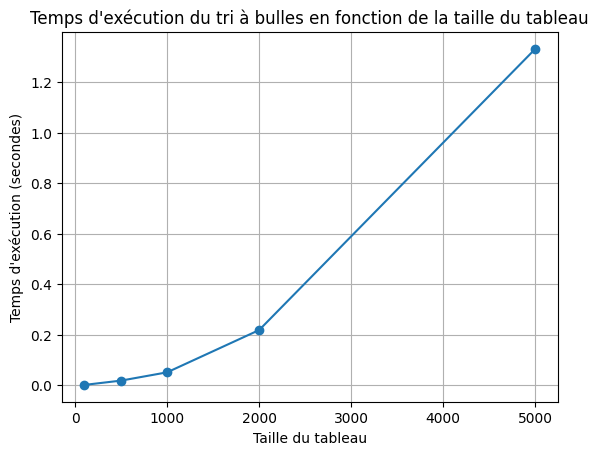

In [17]:
import matplotlib.pyplot as plt

# Définir les tailles de tableau à tester
tailles = [100, 500, 1000, 2000, 5000]

temps_execution = []

for taille in tailles:
    liste_a_trier = [random.randint(0, 1000) for _ in range(taille)]
    temps = timeit.timeit(lambda: tri_a_bulles(liste_a_trier.copy()), number=1)
    temps_execution.append(temps)

# Tracer le graphique
plt.plot(tailles, temps_execution, marker='o')
plt.xlabel('Taille du tableau')
plt.ylabel('Temps d\'exécution (secondes)')
plt.title('Temps d\'exécution du tri à bulles en fonction de la taille du tableau')
plt.grid(True)
plt.show()


# Expérimentation 2 : Sort

La méthode sort() des listes de Python utilise un algorithme de tri appelé "Timsort".
Timsort est un algorithme hybride dérivé de Merge Sort et Insertion Sort, et il a été spécialement conçu pour trier des tableaux de données du monde réel, exploitant les structures de données existantes et les patterns de données pour optimiser les performances.

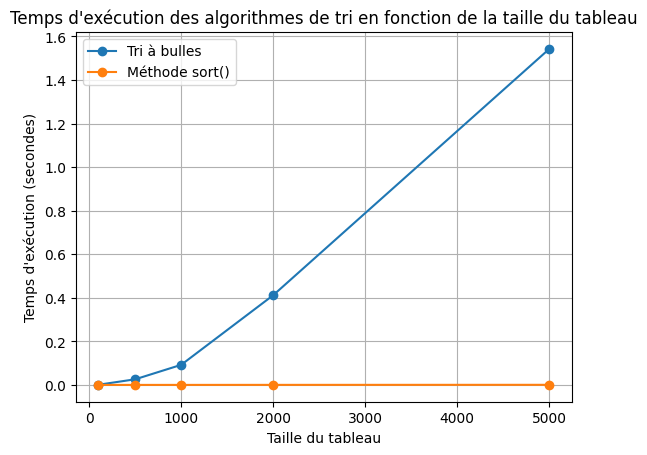

In [18]:
# Définir les tailles de tableau à tester
tailles = [100, 500, 1000, 2000, 5000]

temps_execution_tri_a_bulles = []
temps_execution_sort = []

for taille in tailles:
    liste_a_trier = [random.randint(0, 1000) for _ in range(taille)]

    # Mesure du temps d'exécution du tri à bulles
    temps_tri_a_bulles = timeit.timeit(lambda: tri_a_bulles(liste_a_trier.copy()), number=1)
    temps_execution_tri_a_bulles.append(temps_tri_a_bulles)

    # Mesure du temps d'exécution de la méthode sort()
    temps_sort = timeit.timeit(lambda: liste_a_trier.copy().sort(), number=1)
    temps_execution_sort.append(temps_sort)

# Tracer le graphique
plt.plot(tailles, temps_execution_tri_a_bulles, marker='o', label='Tri à bulles')
plt.plot(tailles, temps_execution_sort, marker='o', label='Méthode sort()')
plt.xlabel('Taille du tableau')
plt.ylabel('Temps d\'exécution (secondes)')
plt.title('Temps d\'exécution des algorithmes de tri en fonction de la taille du tableau')
plt.grid(True)
plt.legend()
plt.show()

# Algo 3 : Tri fusion

1. Implémentation

In [31]:
def tri_fusion(T):
    if len(T) <= 1:
        return T

    # Diviser le tableau en deux moitiés
    milieu = len(T) // 2
    gauche = T[:milieu]
    droite = T[milieu:]

    # Trier récursivement chaque moitié
    gauche = tri_fusion(gauche)
    droite = tri_fusion(droite)

    # Fusionner les deux moitiés triées
    resultat = []
    i = j = 0
    while i < len(gauche) and j < len(droite):
        if gauche[i] < droite[j]:
            resultat.append(gauche[i])
            i += 1
        else:
            resultat.append(droite[j])
            j += 1
    resultat.extend(gauche[i:])
    resultat.extend(droite[j:])

    return resultat


2. Déroulement de la fonction : pour mieux comprendre le fonctionnement

In [29]:
def tri_fusion_déroulée(T):
    if len(T) <= 1:
        return T

    print("Diviser :", T)  # Affiche la liste actuelle avant la division

    # Diviser le tableau en deux moitiés
    milieu = len(T) // 2
    gauche = T[:milieu]
    droite = T[milieu:]

    print("Gauche :", gauche)  # Affiche la moitié gauche
    print("Droite :", droite)  # Affiche la moitié droite

    # Trier récursivement chaque moitié
    gauche = tri_fusion_déroulée(gauche)
    droite = tri_fusion_déroulée(droite)

    # Fusionner les deux moitiés triées
    resultat = []
    i = j = 0
    while i < len(gauche) and j < len(droite):
        if gauche[i] < droite[j]:
            resultat.append(gauche[i])
            i += 1
        else:
            resultat.append(droite[j])
            j += 1
    resultat.extend(gauche[i:])
    resultat.extend(droite[j:])

    print("Fusion :", resultat)  # Affiche la liste fusionnée à chaque étape

    return resultat

# Exemple d'utilisation
liste = [38, 27, 43, 3, 9, 82, 10]
resultat = tri_fusion_déroulée(liste)
print("Résultat final :", resultat)


Diviser : [38, 27, 43, 3, 9, 82, 10]
Gauche : [38, 27, 43]
Droite : [3, 9, 82, 10]
Diviser : [38, 27, 43]
Gauche : [38]
Droite : [27, 43]
Diviser : [27, 43]
Gauche : [27]
Droite : [43]
Fusion : [27, 43]
Fusion : [27, 38, 43]
Diviser : [3, 9, 82, 10]
Gauche : [3, 9]
Droite : [82, 10]
Diviser : [3, 9]
Gauche : [3]
Droite : [9]
Fusion : [3, 9]
Diviser : [82, 10]
Gauche : [82]
Droite : [10]
Fusion : [10, 82]
Fusion : [3, 9, 10, 82]
Fusion : [3, 9, 10, 27, 38, 43, 82]
Résultat final : [3, 9, 10, 27, 38, 43, 82]


## 3. Comparaison du temps d'éxecution

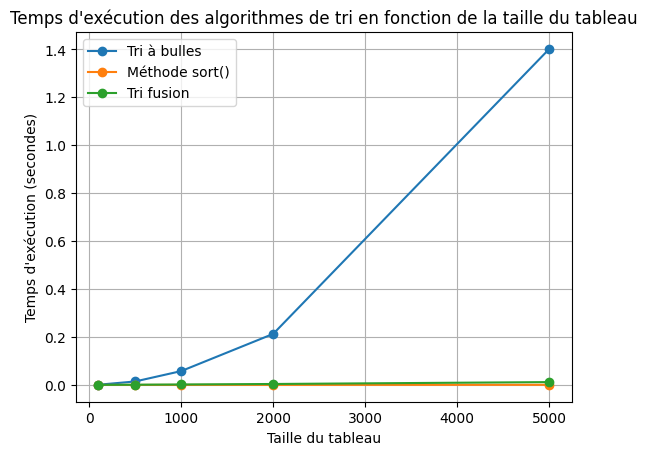

In [33]:
# Définir les tailles de tableau à tester
tailles = [100, 500, 1000, 2000, 5000]

temps_execution_tri_a_bulles = []
temps_execution_sort = []
temps_execution_tri_fusion = []

for taille in tailles:
    liste_a_trier = [random.randint(0, 1000) for _ in range(taille)]

    # Mesure du temps d'exécution du tri à bulles (à commenter si nécessaire)
    temps_tri_a_bulles = timeit.timeit(lambda: tri_a_bulles(liste_a_trier.copy()), number=1)
    temps_execution_tri_a_bulles.append(temps_tri_a_bulles)

    # Mesure du temps d'exécution de la méthode sort() (à commenter si nécessaire)
    temps_sort = timeit.timeit(lambda: liste_a_trier.copy().sort(), number=1)
    temps_execution_sort.append(temps_sort)

    # Mesure du temps d'exécution du tri fusion
    temps_fusion = timeit.timeit(lambda: tri_fusion(liste_a_trier.copy()), number=1)
    temps_execution_tri_fusion.append(temps_fusion)

# Tracer le graphique
plt.plot(tailles, temps_execution_tri_a_bulles, marker='o', label='Tri à bulles')
plt.plot(tailles, temps_execution_sort, marker='o', label='Méthode sort()')
plt.plot(tailles, temps_execution_tri_fusion, marker='o', label='Tri fusion')
plt.xlabel('Taille du tableau')
plt.ylabel('Temps d\'exécution (secondes)')
plt.title('Temps d\'exécution des algorithmes de tri en fonction de la taille du tableau')
plt.grid(True)
plt.legend()
plt.show()
